In [56]:
%matplotlib notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import time

In [57]:
k = 5.
l = 3.
m = 2.
g = 9.8
r0 = 15.
tetha0 = np.pi/8
v0 = 0.
w0 = 0.

In [58]:
#discretización
h = 0.015
N = 2001
t = np.linspace(0, 30, 2001)

In [59]:
#aceleración lineal
def aR(r,v, tetha, w):
    return k*(l-r)/m + g*np.cos(tetha) + r*w**2

In [60]:
#aceleracion angular
def aA(r,v, tetha, w):
    return -g*np.sin(tetha)/l - 2*v*w/r

In [61]:
def Beeman(R0, t, h):
    
    r = np.zeros(len(t))
    v = np.zeros(len(t))
    tetha = np.zeros(len(t))
    w = np.zeros(len(t))
    
    r[0] = R0[0]
    v[0] = R0[1]
    tetha[0] = R0[2]
    w[0] = R0[3]  
    
    #Euler /pasado
    #para velocidad
    ar0 = aR(R0[0], R0[1], R0[2], R0[3])
    vp = R0[1] + ar0*h
    #para velocidad angular
    aA0 = aA(R0[0], R0[1], R0[2], R0[3])
    wp = R0[3] + aA0*h
    
    #Para r
    rp = R0[0] + vp*h
    #para tetha
    tethap = R0[2] + wp*h
    
    r[1] = rp
    v[1] = vp
    tetha[1] = tethap
    w[1] = wp 
    
    for i in tqdm(range(2, len(t))):
        r[i] = r[i-1] + h*v[i-1] + (4*aR(r[i-1], v[i-1], tetha[i-1], w[i-1]) - aR(r[i-2], v[i-2], tetha[i-2], w[i-2]))*(h**2)/6
        tetha[i] = tetha[i-1] + h*w[i-1] + (4*aA(r[i-1], v[i-1], tetha[i-1], w[i-1]) - aA(r[i-2], v[i-2], tetha[i-2], w[i-2]))*(h**2)/6
        v[i] = v[i-1] + (3*aR(r[i-1], v[i-1], tetha[i-1], w[i-1]) - aR(r[i-2], v[i-2], tetha[i-2], w[i-2]))*h/2
        w[i] = w[i-1] + (3*aA(r[i-1], v[i-1], tetha[i-1], w[i-1]) - aA(r[i-2], v[i-2], tetha[i-2], w[i-2]))*h/2
        
    return r, v, tetha, w

In [62]:
R0 = [r0, v0, tetha0, w0]

In [63]:
r, v, tetha, w = Beeman(R0, t, h)

100%|████████████████████████████████████████████████████████████████████████████| 1999/1999 [00:00<00:00, 8206.33it/s]


In [65]:
#corrector
vc = np.zeros(len(t))
wc = np.zeros(len(t))
for i in range(2, len(t)+2):
    vc[i] = v[i-1] + (5*aR(r[i],v[i], tetha[i], w[i]) + 8*aR(r[i-1],v[i-1], tetha[i-1], w[i-1]) - aR(r[i-2],v[i-2], tetha[i-2], w[i-2]))/12
    wc[i] = w[i-1] + (5*aA(r[i],v[i], tetha[i], w[i]) + 8*aR(r[i-1],v[i-1], tetha[i-1], w[i-1]) - aA(r[i-2],v[i-2], tetha[i-2], w[i-2]))/12

IndexError: index 2001 is out of bounds for axis 0 with size 2001

<IPython.core.display.Javascript object>


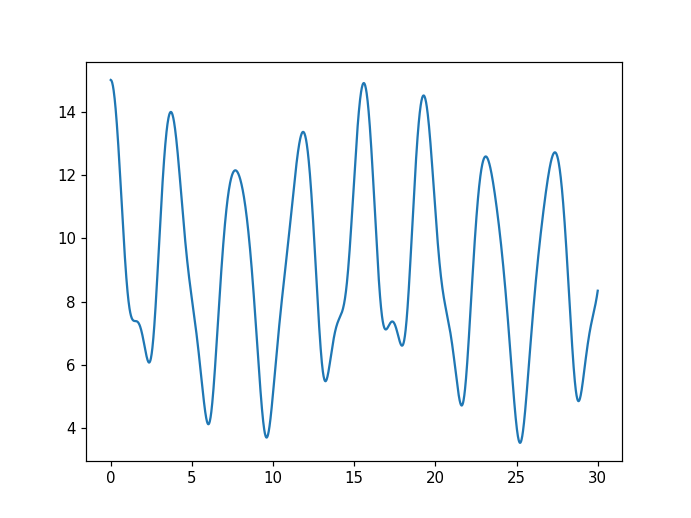

In [66]:
plt.plot(t, r)
plt.show()